# Research Questions

## RQ1: How does the numeric rating/score within reviews affect the booking rates of listings?

## RQ2: How does the sentiment and language used in Airbnb text reviews correlate with booking rate?

## RQ3: Can the frequency and quality of host responses (time) predict the likelihood of repeat or future bookings?

- handle missing values (henry)
- coorelation analysis (Brandon)
- histogram/scatterplot for some key variables 
- summary stats (nawal)


1) If your research questions have been updated from the proposal. What's your new research questions?
2) Describe if your methodology has been updated since milestone 1 (proposal) and how. 
3) Describe your current results, e.g., finding from data exploration, answer to research questions 1. 
4) Update the member contribution section based on progress so far.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:


# Replace 'your_dataset.csv' with the path to your CSV file
file_path = './raw-dataset/nyc_listings.csv' 

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Output the first 5 rows of the DataFrame
df



,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,977395984065981849,https://www.airbnb.com/rooms/977395984065981849,20240206005441,2024-02-06,city scrape,Home in Brooklyn · 1 bedroom · 1 bed · 1 bath,This unique place has a style all its own. Is ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,95344065,...,4.00,4.00,3.00,NaN,f,7,1,6,0,0.86
1,648033676238017128,https://www.airbnb.com/rooms/648033676238017128,20240206005441,2024-02-06,city scrape,Rental unit in Bronx · ★4.89 · 1 bedroom · 1 b...,Welcome to this beautiful cozy bedroom in a sp...,NaN,https://a0.muscache.com/pictures/85291dc6-1e55...,421601513,...,4.83,4.94,4.94,NaN,f,3,0,3,0,0.95
2,871990853610302281,https://www.airbnb.com/rooms/871990853610302281,20240206005441,2024-02-06,city scrape,Rental unit in Queens · ★New · 1 bedroom · Hal...,"Kick back and relax in this calm, open space.",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,484563208,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
3,15943497,https://www.airbnb.com/rooms/15943497,20240206005441,2024-02-06,city scrape,Home in Brooklyn · ★4.74 · 1 bedroom · 1 bed ·...,"Our home is steps away from train, 20 minutes ...",I live in the Bedford Stuyvesant part of Brook...,https://a0.muscache.com/pictures/bcd9135c-fa7d...,88043058,...,4.94,4.86,4.75,NaN,f,3,0,3,0,2.14
4,845596919658541172,https://www.airbnb.com/rooms/845596919658541172,20240206005441,2024-02-10,city scrape,Rental unit in Brooklyn · 4 bedrooms · 1 bed ·...,"- Huge furnished room, PRIVATE BATHROOM, TWO l...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3223938,...,NaN,NaN,NaN,NaN,f,600,1,599,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39197,1061633200531291580,https://www.airbnb.com/rooms/1061633200531291580,20240206005441,2024-02-06,previous scrape,Hotel in Queens · ★New · 1 bedroom · 2 beds · ...,This Suite is our largest room in our hotel an...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,544554359,...,NaN,NaN,NaN,Exempt,t,5,0,5,0,NaN
39198,932893071035345056,https://www.airbnb.com/rooms/932893071035345056,20240206005441,2024-02-06,city scrape,Condo in Brooklyn · 1 bedroom · 3 beds · 2.5 b...,"Come stay in a newly developed, modern duplex....",Bushwick is a hip and culturally diverse neigh...,https://a0.muscache.com/pictures/hosting/Hosti...,171636572,...,NaN,NaN,NaN,OSE-STRREG-0000365,f,1,0,1,0,NaN
39199,765951216153524797,https://www.airbnb.com/rooms/765951216153524797,20240206005441,2024-02-06,previous scrape,Hotel in New York · 1 bedroom · 1 bed · 1 priv...,"Upscale luxury queen bed, with local views, fu...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,202829797,...,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
39200,4352537,https://www.airbnb.com/rooms/4352537,20240206005441,2024-02-06,city scrape,Condo in New York · ★4.69 · 2 bedrooms · 2 bed...,Come enjoy new york in this beautiful large pr...,"love my neighborhood charm, parks, quietness (...",https://a0.muscache.com/pictures/b956b9fe-f759...,22595345,...,4.76,4.83,4.62,NaN,f,1,1,0,0,0.51


In [5]:
def combine_data(source_folder_name="raw-dataset"):
    
    locations = ['toronto','sanfran','nyc','london','sydney']
    types = ['listings', 'reviews']

    global listings, reviews
    listings = pd.DataFrame()
    reviews = pd.DataFrame()

    for t in types:
        
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            data.append(pd.read_csv(filename))

        if t == 'listings':
            listings = pd.concat(data)

        if t == 'reviews':
            reviews = pd.concat(data)

    
combine_data()

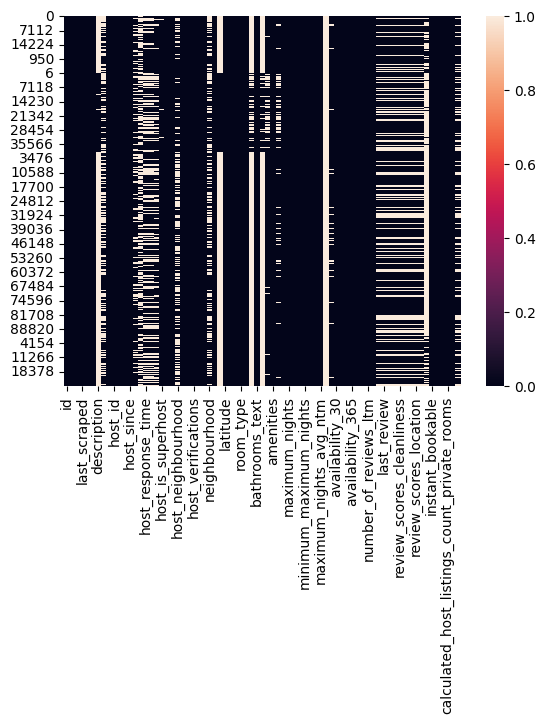

In [25]:
def visualize_missing_values(df):
    sns.heatmap(df.isnull())

visualize_missing_values(listings)


In [23]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...
...,...,...,...,...,...,...
560768,1036664205763630399,1041573493852143924,2023-12-07,335015849,潜龙,Really a nice place to live.
560769,1037236296409049255,1039429414550067861,2023-12-04,437312944,Billy,Recently stayed at 8 Cayley Place in Cabramatt...
560770,1037287168532415936,1043098170764301778,2023-12-09,358329708,Jasmine,"Definitely recommend, friendly host and such a..."
560771,1037390653835404948,1043027903503674117,2023-12-09,202688488,Miranda,Anna & Nick were just amazing so helpful and f...


In [18]:
def get_full_summary(df):
    # Numeric summary using describe() for numeric columns, updated include parameter
    numeric_summary = df.describe(include='number')
    
    # Adding median to numeric summary. Adjusting the method for potential compatibility issues
    try:
        median = df.median(numeric_only=True).to_frame().T.rename(index={0: 'median'})
    except TypeError:  # In case of unexpected TypeError, fall back to excluding non-numeric
        median = df.select_dtypes(include='number').median().to_frame().T.rename(index={0: 'median'})
    
    numeric_summary = pd.concat([numeric_summary, median], axis=0)

    # Categorical summary using describe() for categorical columns
    categorical_summary = df.describe(exclude='number')
    
    return {'numeric_summary': numeric_summary, 'categorical_summary': categorical_summary}

full_summary = get_full_summary(listings)
print("Numeric Summary:")
print(full_summary['numeric_summary'])
print("\nCategorical Summary:")
print(full_summary['categorical_summary'])

Numeric Summary:
                  id     scrape_id       host_id  host_listings_count  \
count   1.849020e+05  1.849020e+05  1.849020e+05        184887.000000   
mean    3.748961e+17  2.023410e+13  1.636313e+08            69.006750   
std     4.339954e+17  4.188633e+09  1.740111e+08           424.989234   
min     9.580000e+02  2.023120e+13  1.169000e+03             1.000000   
25%     2.227959e+07  2.023121e+13  2.137584e+07             1.000000   
50%     4.918232e+07  2.023121e+13  8.550403e+07             2.000000   
75%     8.461659e+17  2.024011e+13  2.765347e+08             7.000000   
max     1.084860e+18  2.024021e+13  5.597047e+08          5110.000000   
median  4.918232e+07  2.023121e+13  8.550403e+07             2.000000   

        host_total_listings_count       latitude      longitude  \
count               184887.000000  184902.000000  184902.000000   
mean                   115.096632      35.999010      -8.994592   
std                    674.522376      28.341661   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(df, column1, column2):
  
    # Set up the matplotlib figure and axes for two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the first column histogram
    df[column1].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Frequency')
    
    # Plot the second column histogram
    df[column2].hist(ax=axes[1], bins=20, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'Histogram of {column2}')
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel('Frequency')
    
    # Ensure the layout is not too tight
    plt.tight_layout()
    
    # Display the plots
    plt.show()

In [19]:
import pandas as pd

def analyze_data_cleaning_needs(df):
    """
    Analyze a CSV file for common data cleaning needs.
    
    Args:
    csv_file_path (str): The path to the CSV file.
    
    Returns:
    dict: A summary of findings including missing values, data types, duplicates, and potential outliers.
    """
    
    # Initialize the analysis dictionary
    analysis = {
        "missing_values": df.isnull().sum(),
        "data_types": df.dtypes,
        "duplicate_rows": df.duplicated().sum(),
        "potential_outliers": {}
    }
    
    # Check for potential outliers using IQR
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
        if outlier_count > 0:
            analysis["potential_outliers"][column] = outlier_count
            
    return analysis

analyze_data_cleaning_needs(listings)

{'missing_values': id                                                  0
 listing_url                                         0
 scrape_id                                           0
 last_scraped                                        0
 source                                              0
                                                 ...  
 calculated_host_listings_count                      0
 calculated_host_listings_count_entire_homes         0
 calculated_host_listings_count_private_rooms        0
 calculated_host_listings_count_shared_rooms         0
 reviews_per_month                               49970
 Length: 75, dtype: int64,
 'data_types': id                                                int64
 listing_url                                      object
 scrape_id                                         int64
 last_scraped                                     object
 source                                           object
                                                  .